Noise Reduction

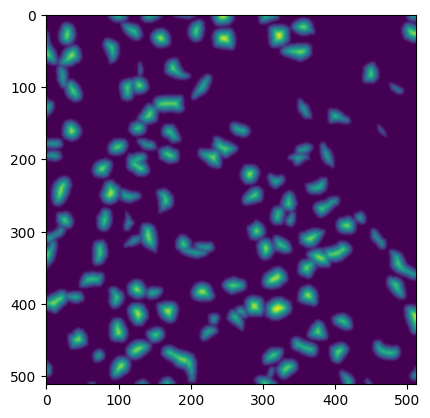

In [8]:
from skimage import io,filters
from matplotlib import pyplot as plt

image =io.imread('/content/human_bladder_04.png')
gassiuan_image =filters.gaussian(image)

plt.imshow(gassiuan_image)


Finding Intensity Gradient of the Image


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the image
image = cv2.imread('/content/human_bladder_04.png')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [3]:
# Calculate the x and y gradients
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y


In [4]:
# Calculate the magnitude of the gradient
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)  # Convert to uint8

# Optionally, calculate the direction of the gradient
gradient_direction = np.arctan2(sobely, sobelx)  # In radians


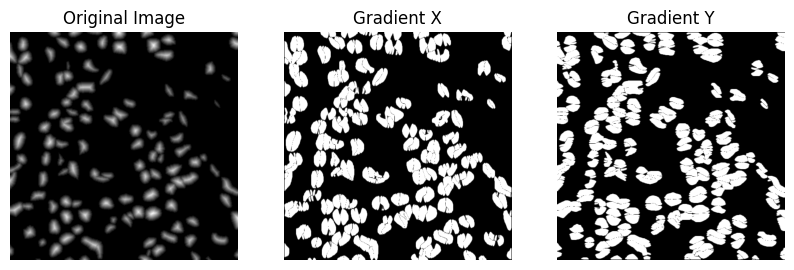

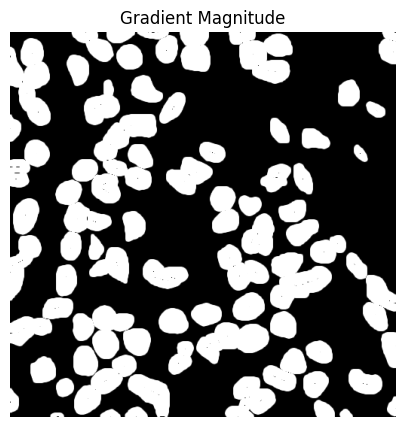

In [5]:
# Plotting the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gradient X')
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gradient Y')
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray')
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.show()


Non-maximum suppression

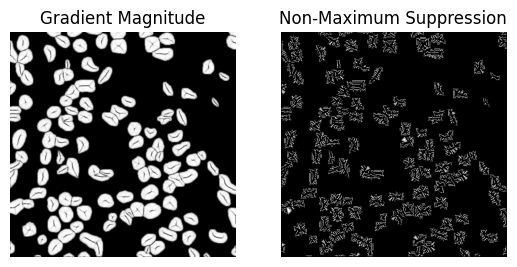

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_maximum_suppression(gradient_magnitude, gradient_direction):
    height, width = gradient_magnitude.shape
    # Create an empty array to hold the suppressed image
    suppressed = np.zeros_like(gradient_magnitude)

    # Iterate through the image, excluding the borders
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Get the angle of the gradient
            angle = gradient_direction[i, j] * 180. / np.pi  # Convert to degrees
            angle = angle % 180  # Normalize to [0, 180)

            # Determine the neighboring pixels based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbors = (gradient_magnitude[i, j + 1], gradient_magnitude[i, j - 1])
            elif 22.5 <= angle < 67.5:
                neighbors = (gradient_magnitude[i + 1, j - 1], gradient_magnitude[i - 1, j + 1])
            elif 67.5 <= angle < 112.5:
                neighbors = (gradient_magnitude[i + 1, j], gradient_magnitude[i - 1, j])
            else:  # 112.5 <= angle < 157.5
                neighbors = (gradient_magnitude[i - 1, j - 1], gradient_magnitude[i + 1, j + 1])

            # Non-maximum suppression
            if (gradient_magnitude[i, j] >= max(neighbors)):
                suppressed[i, j] = gradient_magnitude[i, j]

    return suppressed

# Load the image and convert it to grayscale
image = cv2.imread('/content/human_bladder_04.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the gradients
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
gradient_direction = np.arctan2(sobely, sobelx)  # in radians

# Apply non-maximum suppression
nms_output = non_maximum_suppression(gradient_magnitude, gradient_direction)

# Display the results
plt.subplot(1, 2, 1)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Non-Maximum Suppression')
plt.imshow(nms_output, cmap='gray')
plt.axis('off')

plt.show()


Hysteresis Thresholding

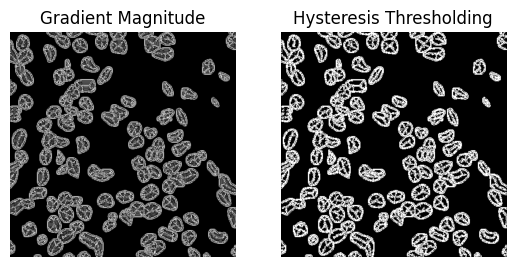

In [7]:


def hysteresis_thresholding(gradient_magnitude, low_threshold, high_threshold):
    # Create an output image initialized to 0
    output = np.zeros_like(gradient_magnitude, dtype=np.uint8)

    # Apply high threshold
    strong_edges = (gradient_magnitude >= high_threshold)
    weak_edges = ((gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold))

    # Mark strong edges in output image
    output[strong_edges] = 255  # Strong edges set to white (255)

    # Iterate through the weak edges
    for i in range(1, output.shape[0] - 1):
        for j in range(1, output.shape[1] - 1):
            if weak_edges[i, j]:
                # Check 8-connected neighborhood for strong edges
                if np.any(strong_edges[i-1:i+2, j-1:j+2]):
                    output[i, j] = 255  # Mark as edge if connected to strong edge

    return output

# Load the image and convert it to grayscale
image = cv2.imread('/content/human_bladder_04.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the gradients
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2).astype(np.uint8)

# Define the thresholds
low_threshold = 50
high_threshold = 150

# Apply hysteresis thresholding
hysteresis_output = hysteresis_thresholding(gradient_magnitude, low_threshold, high_threshold)

# Display the results
plt.subplot(1, 2, 1)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hysteresis Thresholding')
plt.imshow(hysteresis_output, cmap='gray')
plt.axis('off')

plt.show()
